## Used_Cars_Predication

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

### Reading CSV File 

In [2]:
cars_data = pd.read_csv("car details v4.csv")
cars_data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


#### In all we have 20 features consisting of both the categorical as well as the numerical features. The target variable is the 'Price' of the cars.

### Returns Array Of Columns In Dataset.

In [3]:
cars_data.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [4]:
def seprate_data_types(cars_data):                  
    categorical = []
    continuous = []
    for column in cars_data.columns:                
        if cars_data[column].nunique() < 100:       
                                                   
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(cars_data)        

from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Contiuous": continuous}, headers = ["categorical", "continuous"]))

categorical         continuous
------------------  ------------
Make                Model
Year                Price
Fuel Type           Kilometer
Transmission        Engine
Location            Max Power
Color               Max Torque
Owner               Length
Seller Type         Width
Drivetrain          Height
Seating Capacity
Fuel Tank Capacity


### Checking Null Values. 

In [5]:
cars_data.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

#### Observation: The dataframe contains null values in 9 out of 20 columns, indicating missing or incomplete data in those specific columns.

### Checking for duplicate values

In [6]:
dup = cars_data[cars_data.duplicated()]
dup

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity


#### Observation: The dataframe does not contain any duplicate values, indicating that each row in the dataset is unique. This suggests that there are no exact duplicate entries within the data, ensuring data integrity and avoiding redundancy in the analysis.

#### Making a function to check unique values. mode and null values of the columns.

In [7]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {cars_data[col].unique()}") 
    print(f"Mode of {col} is {cars_data[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {cars_data[col].isnull().sum()}") 

#### The "Engine," "Max Power," and "Max Torque" columns contain values with units in RPM (revolutions per minute). However, for model prediction purposes, the unit information is not required. Therefore, it is safe to remove the unit (RPM) from these columns and create separate columns specifically for RPM values.

#### 1. Engine Column.

Steps: 
1. Split the values into two separate columns. (i.e engine_value and engine_unit column)
2. Convert the "engine_value" column to numeric data type.
3. Combine the treated values back into a single column.
4. Drop the intermediate columns.

In [8]:
cars_data[["engine_value", "engine_unit"]] = cars_data["Engine"].str.split(" ", n=1, expand = True)

In [9]:
cars_data["engine_value"] = pd.to_numeric(cars_data["engine_value"], errors = "coerce")
cars_data["Engine"] = cars_data["engine_value"]

In [10]:
cars_data = cars_data.drop(["engine_value", "engine_unit"], axis = 1)

#### 2. Max Power Column.

Steps:

1. Split the values into three separate columns. (i.e max_power_value, max_power_unit and max_power_info column)
2. Convert the "max_power_value" column to numeric data type.
3. Combine the treated values back into a single column.
4. Drop the intermediate columns.

In [11]:
cars_data[["max_power_value", "max_power_unit", "max_power_info"]] = cars_data["Max Power"].str.split(" ", n=2, expand=True)

In [12]:
cars_data[["at","rpm", "unit"]] = cars_data["max_power_info"].str.split(" ", n=2, expand =True)

In [13]:
cars_data["max_power_value"] = pd.to_numeric(cars_data["max_power_value"], errors="coerce")
cars_data["rpm"] = pd.to_numeric(cars_data["rpm"], errors="coerce")
cars_data["Max Power"] = cars_data["max_power_value"]

In [14]:
cars_data =cars_data.drop(["max_power_value", "max_power_unit", "max_power_info", "at", "unit"], axis=1)

#### 3. Max Torque Column.

Steps:

1. Split the values into three separate columns. (i.e max_power_value, max_power_unit and max_power_info column)
2. Convert the "max_power_value" column to numeric data type.
3. Combine the treated values back into a single column.
4. Drop the intermediate columns.

In [15]:
cars_data[["max_torque_value", "max_torque_unit", "max_torque_info"]] = cars_data["Max Torque"].str.split(" ", n = 2, expand = True )

In [16]:
cars_data[["at","rpm_t", "unit"]] = cars_data["max_torque_info"].str.split(" ", n=2, expand =True)

In [17]:
cars_data["max_torque_value"] = pd.to_numeric(cars_data["max_torque_value"], errors = "coerce")
cars_data["rpm_t"] = pd.to_numeric(cars_data["rpm_t"], errors = "coerce")
cars_data["Max Torque"]= cars_data["max_torque_value"]

In [18]:
cars_data = cars_data.drop(["max_torque_value", "max_torque_unit", "max_torque_info", "at", "unit"], axis =1)
cars_data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,rpm,rpm_t
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,87.0,109.0000,FWD,3990.0,1680.0,1505.0,5.0,35.0,6000.0,4500.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,74.0,190.0000,FWD,3995.0,1695.0,1555.0,5.0,42.0,4000.0,2000.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,79.0,112.7619,FWD,3585.0,1595.0,1550.0,5.0,35.0,6000.0,4000.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,82.0,113.0000,FWD,3995.0,1745.0,1510.0,5.0,37.0,6000.0,4200.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,148.0,343.0000,RWD,4735.0,1830.0,1795.0,7.0,55.0,3400.0,1400.0


#### Analysis of Numerical Columns.

In [19]:
num = cars_data.select_dtypes(include = [float, int])
cat = cars_data.select_dtypes(include = object)
cat = cat.drop(["Make", "Model", "Location"], axis=1)

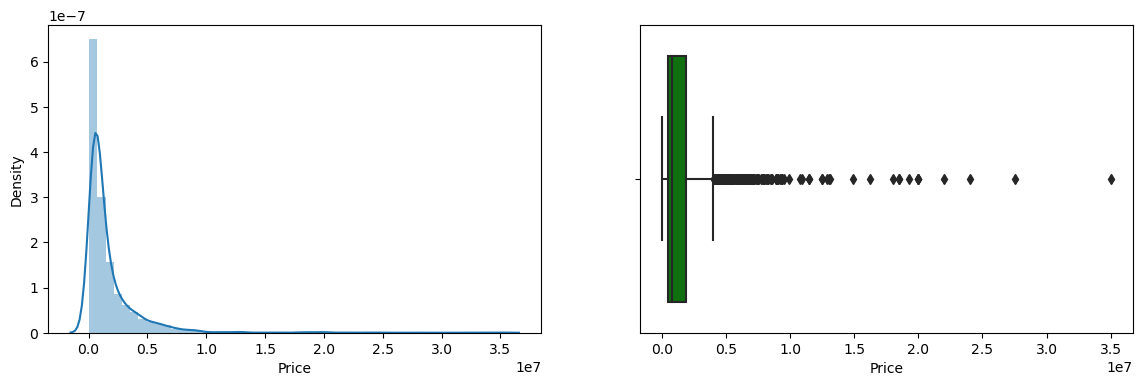

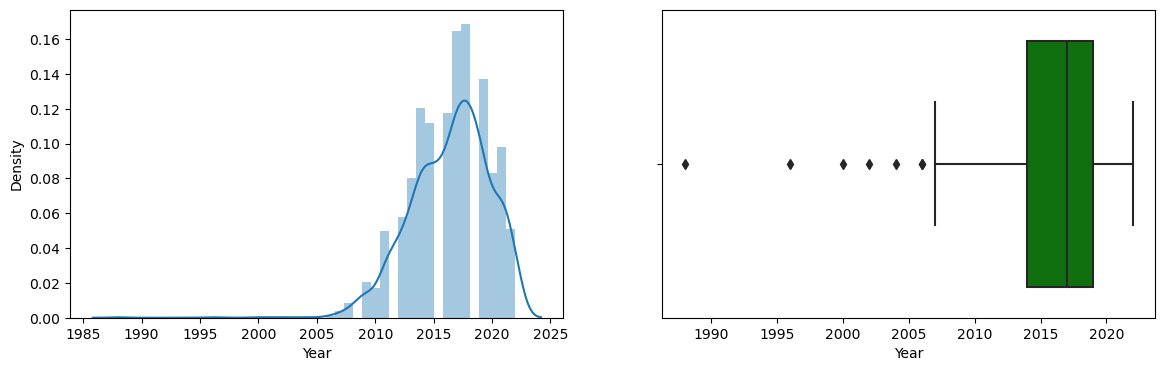

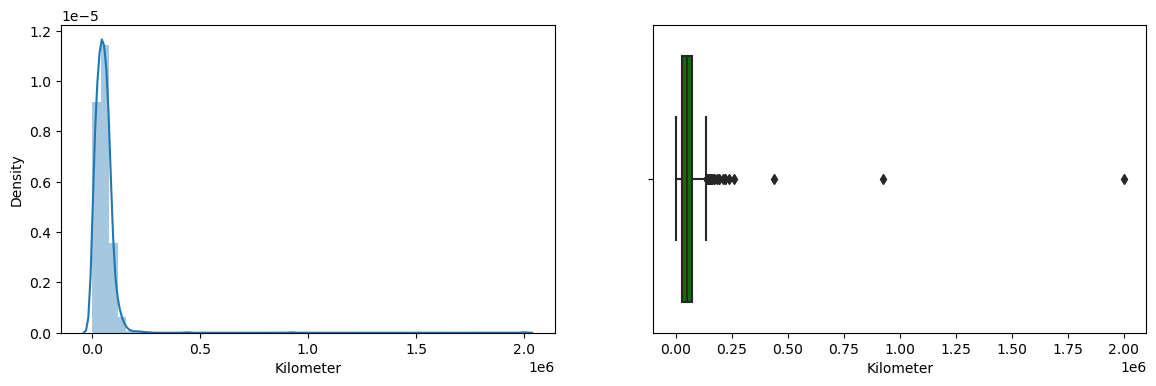

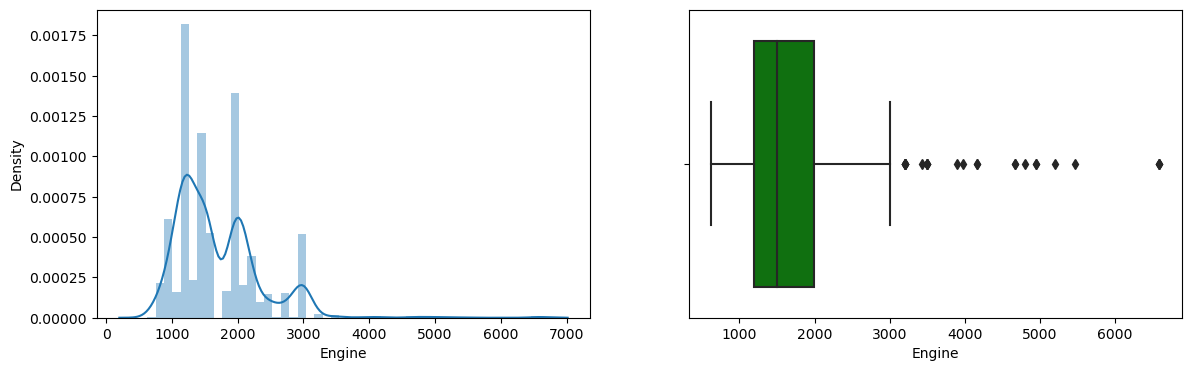

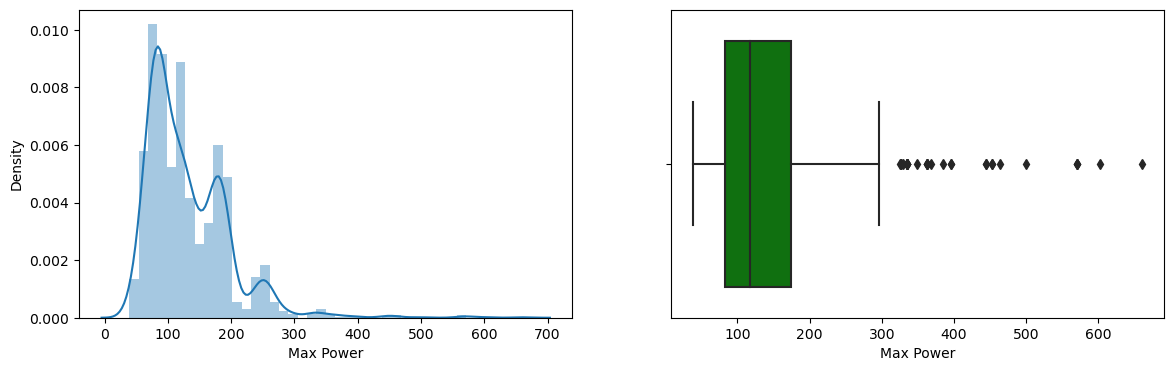

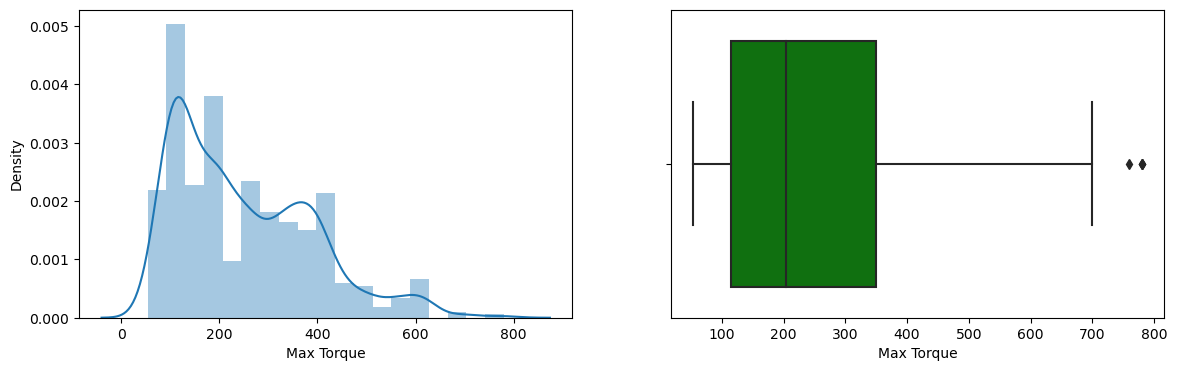

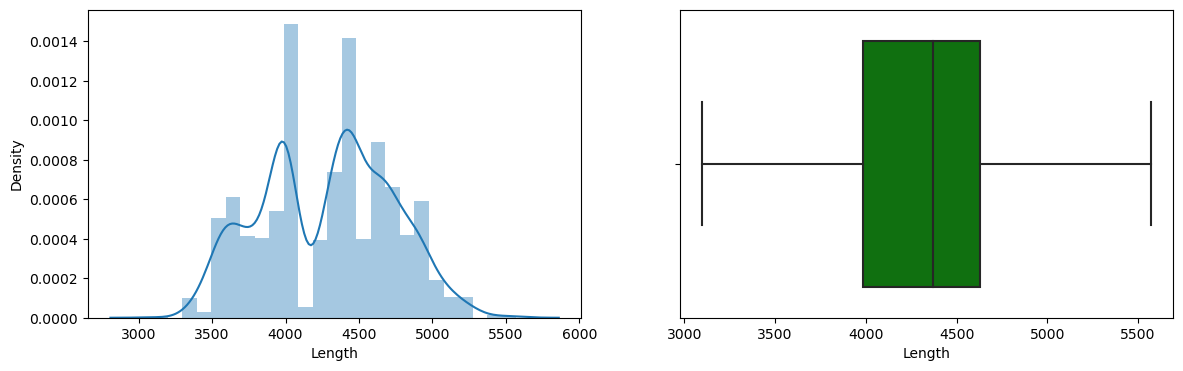

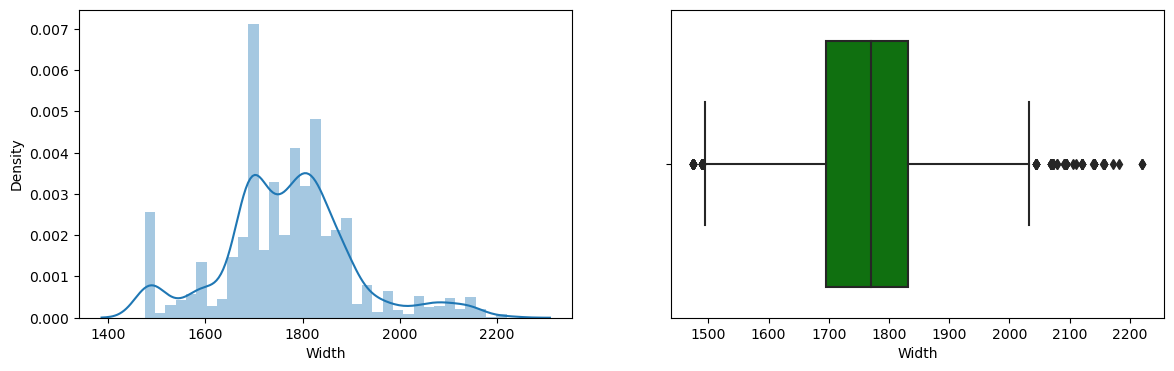

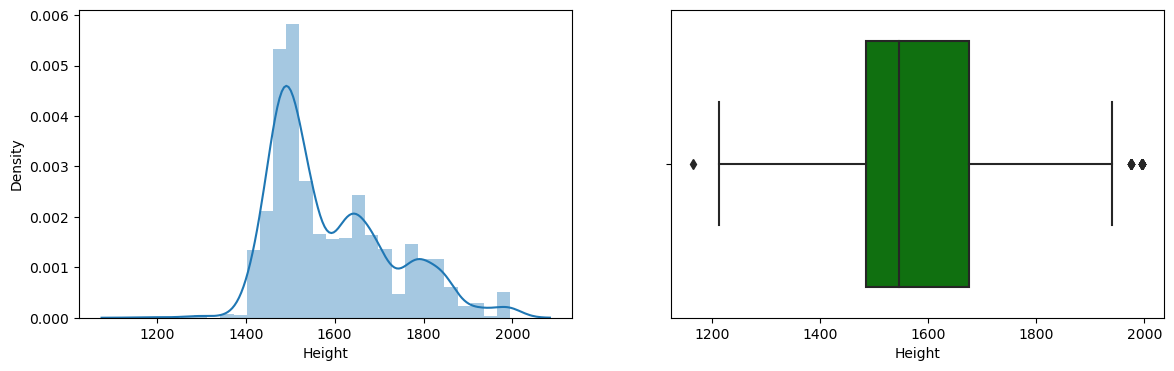

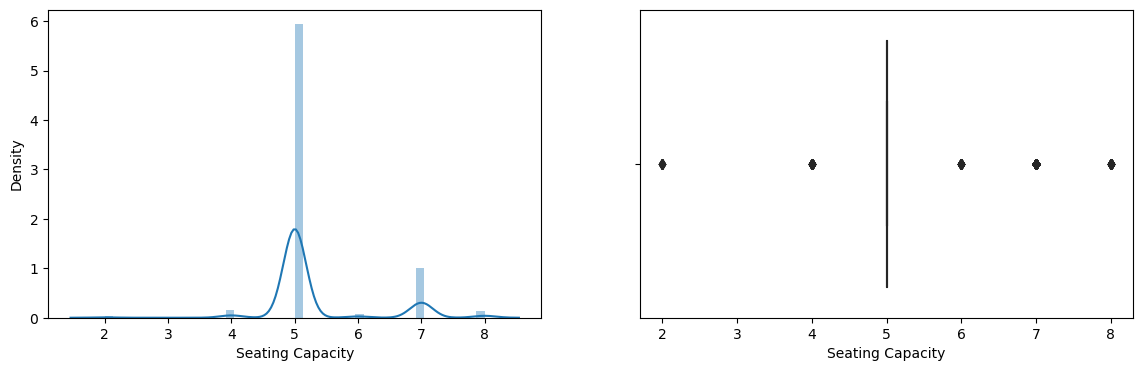

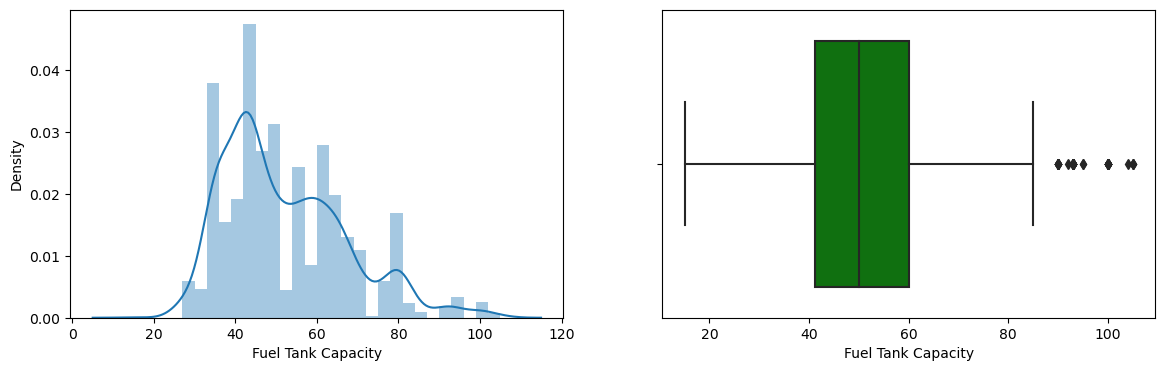

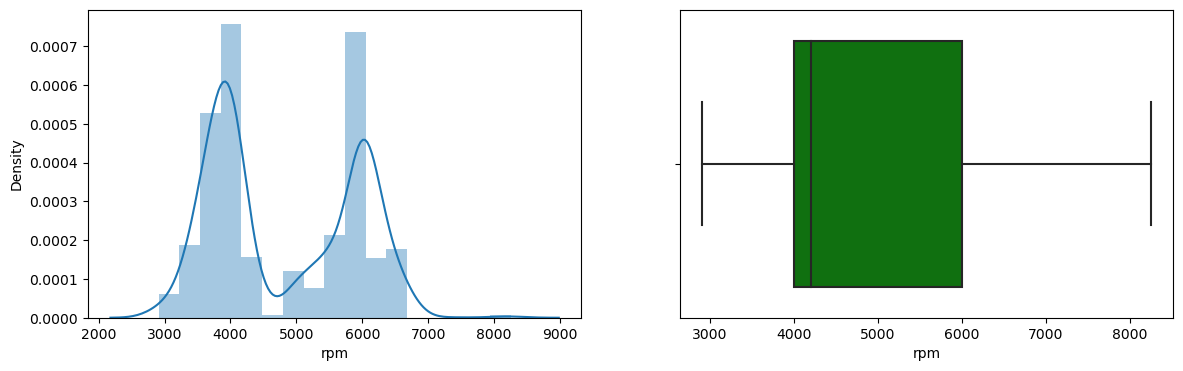

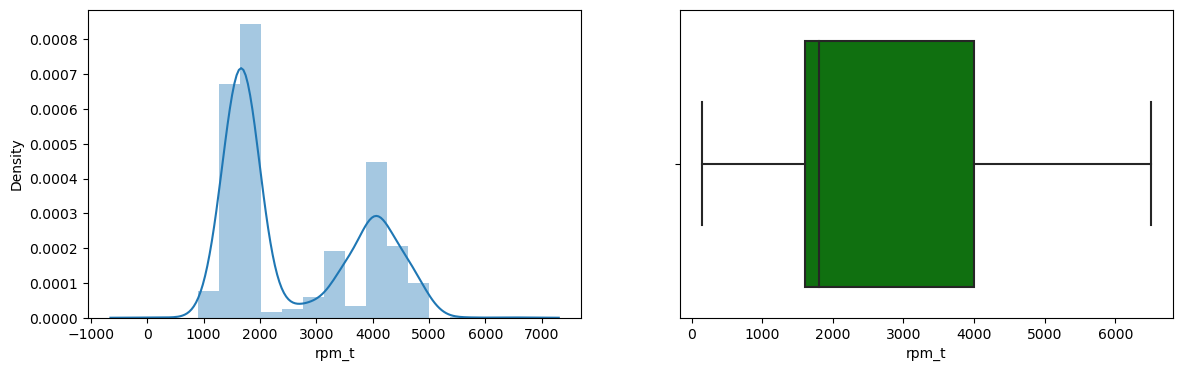

In [20]:
for col in num:
    
    fig, axes = plt.subplots(1,2, figsize=(14, 4))

    plt.subplot(121)
    sns.distplot(cars_data[col])
    
    plt.subplot(122)
    sns.boxplot(x = cars_data[col], color = 'green')

plt.show()

#### Observation: 
1. The majority of the data in our dataset exhibits a skewed distribution, indicating that the values tend to cluster towards one end, with a long tail on the other end. Skewed data suggests that there might be a presence of outliers or an uneven distribution of values, which can impact the analysis and interpretation of the data.
2. The "Seating Capacity" column exhibit a significant imbalance in their distribution, indicating a disproportionate representation of certain categories compared to others. Due to this severe imbalance, it might be appropriate to remove these column from the analysis to prevent potential biases or misleading conclusions.
3. The columns "Year," "Kilometer," "Engine," "Max Power," "Max Torque," "Width," "Height," and "Fuel Tank Capacity" contain outliers, indicating the presence of extreme values that deviate significantly from the majority of the data. These outliers may potentially impact the analysis and interpretation of these attributes.
4. The columns "rpm" and "rpm_t" exhibit a binomial distribution pattern, suggesting that the values are categorized into specific bins or intervals. This characteristic allows for the application of binning techniques to further analyze and interpret the data.

#### Before treating outliers we have to check the relation between target variable with independent columns.

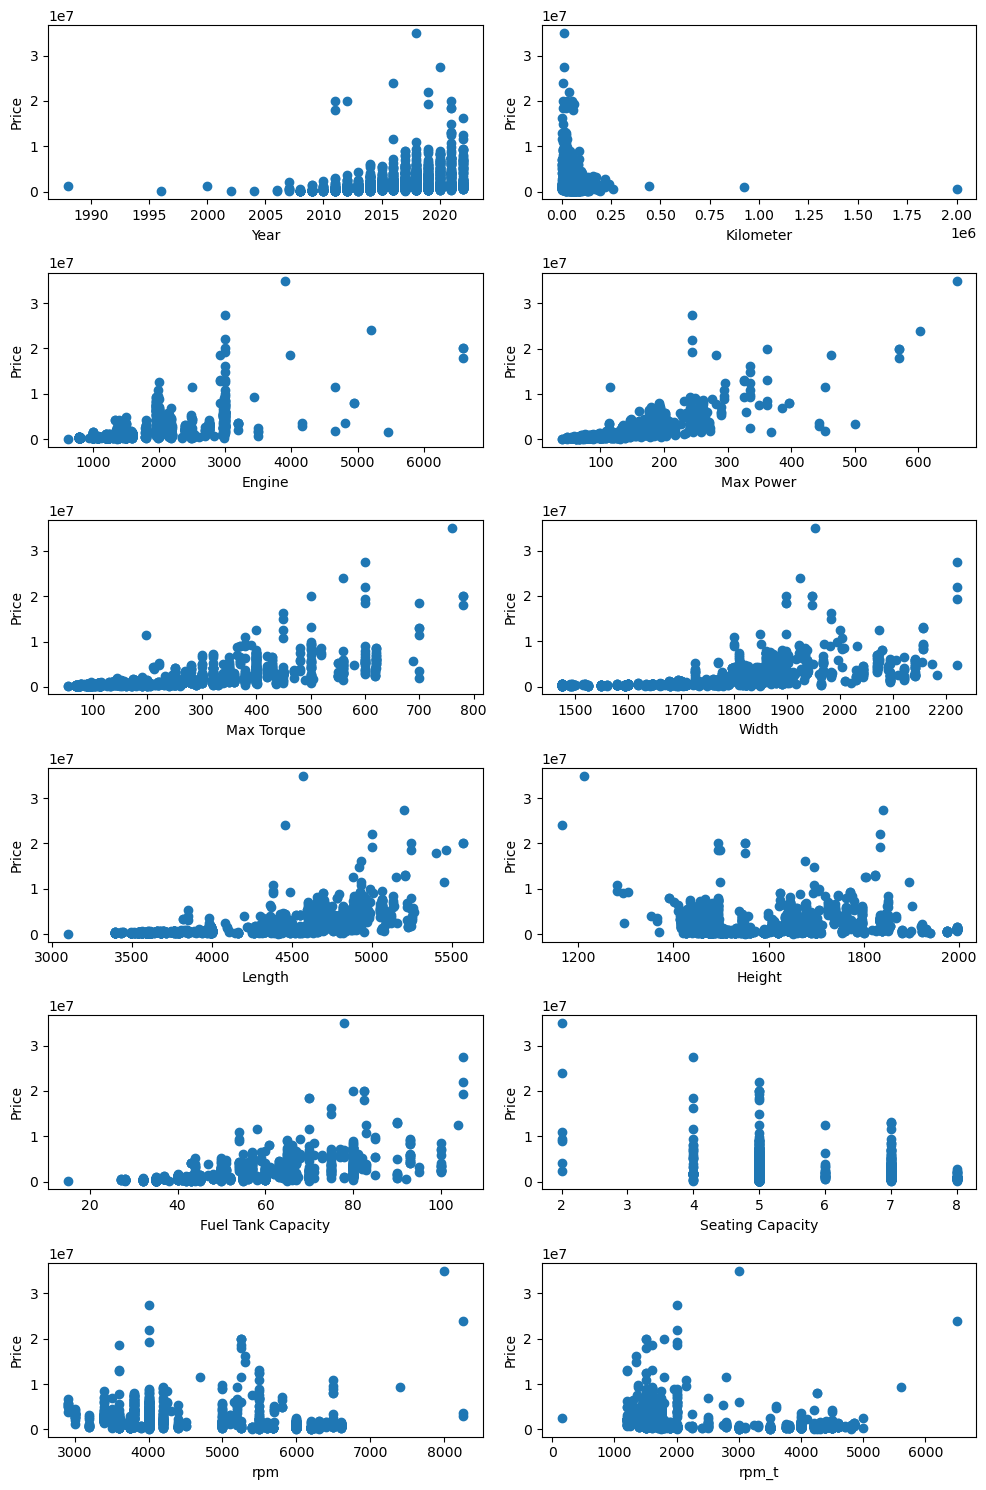

In [21]:
target_variable = "Price"
independent_variables = ["Year", "Kilometer", "Engine", "Max Power", "Max Torque", "Width", "Length", "Height", "Fuel Tank Capacity", "Seating Capacity", "rpm", "rpm_t" ]

fig, axes = plt.subplots(6, 2, figsize=(10, 15))
axes = axes.flatten()

for i, variable in enumerate(independent_variables):
    axes[i].scatter(cars_data[variable], cars_data[target_variable])
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel(target_variable)

plt.tight_layout()
plt.show()

#### Observation:
1. The relationship between the "Year" and "Price" columns shows that older cars tend to have lower prices.
2. The relationship between the "Kilometer" and "Price" columns indicates that cars greater distance driven tend to have lower prices.
3. The relationship between the "Engine", Max Power, Max Torque with "Price" columns reveals that cars with more powerful engines tend to have higher prices.
4. The relationship between the "Width", and "Length" with "Price" columns suggests that as the width of a car increases, there is a tendency for the price to also increase.
5. The relationship between the "Fuel Tank Capacity" and "Price" columns indicates that as the fuel tank capacity of a car increases, there is a tendency for the price to also increase.
6. The relationship between the "Height", "Seating Capacity", "rpm" and "rpm_t" with "Price" columns does not exhibit a clear correlation or trend. There seems to be no significant relationship between the height of a car and its price, so it might be appropriate to remove these columns from the analysis.

#### Note: In addition to the specific attributes mentioned, it is important to consider the influence of the car make or brand on the price. Generally, higher-end or well-established brand cars tend to have higher prices, while lesser-known or budget-friendly brand cars often have lower prices. The brand factor plays a significant role in determining the price of a car, impacting the perceived quality, reputation, and desirability of the vehicle.

#### Analysis of categorical columns

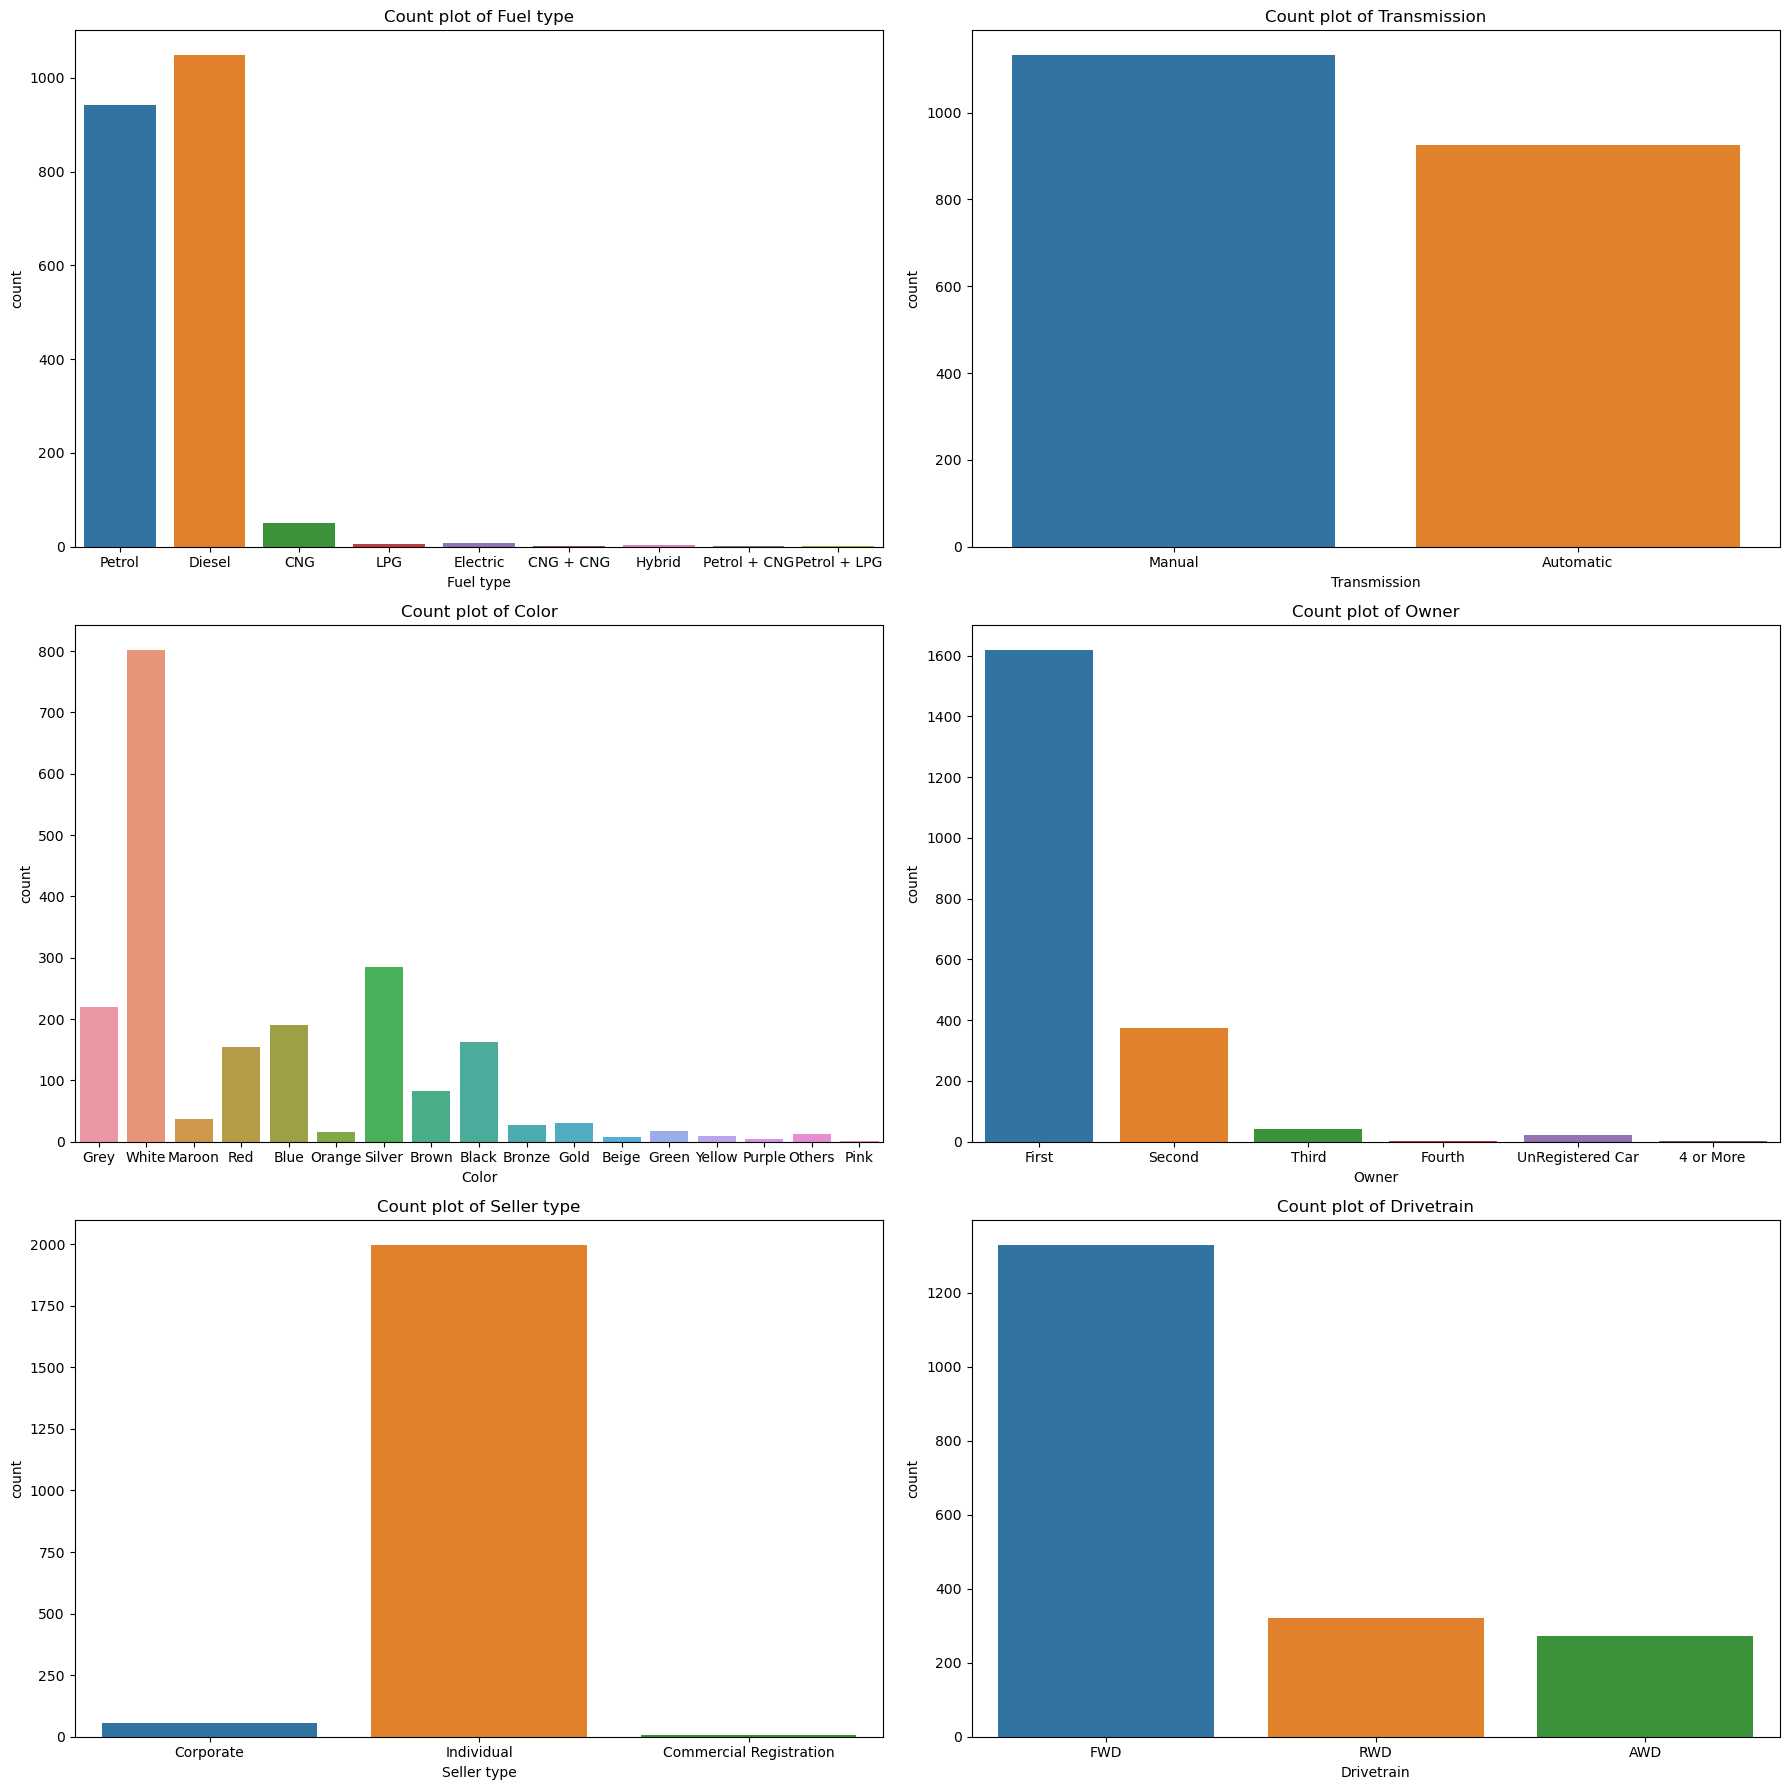

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()

for i, category in enumerate(cat):
    sns.countplot(x=category, data=cars_data, ax=axes[i])
    axes[i].set_xlabel(category.capitalize())
    axes[i].set_ylabel("count")
    axes[i].set_title(f"Count plot of {category.capitalize()}")

plt.tight_layout()
plt.show()

#### Observation: 
1. The "Seller Type" column exhibit a significant imbalance in their distribution, indicating a disproportionate representation of certain categories compared to others. Due to this severe imbalance, it might be appropriate to remove these column from the analysis to prevent potential biases or misleading conclusions.

### Delete unnecessary columns

From above observation following columns are deleted

In [23]:
cars_data = cars_data.drop(["Seller Type", "rpm", "rpm_t", "Height", "Seating Capacity", "Color", "Model"], axis=1)

### Plot Heat Map

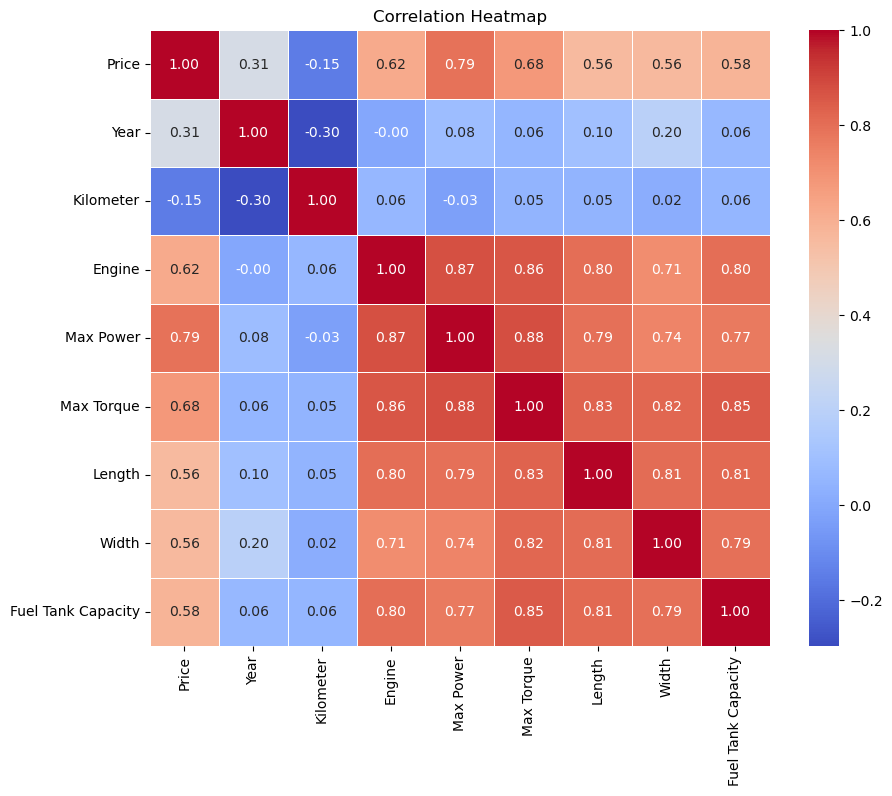

In [24]:
corr_matrix = cars_data.corr()

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax)
plt.title("Correlation Heatmap")
plt.show()

#### Observation: 
1. Based on the analysis of the dataset, it can be observed that the variables "Max Power," "Torque," and "Engine" are highly correlated with each other, with a correlation coefficient of more than 80%. Additionally, it is found that "Max Power" exhibits a higher correlation with the target variable compared to "Torque" and "Engine." Therefore, it is recommended to keep only the "Max Power" variable and remove "Torque" and "Engine" from the dataset.
2. The variables "Length", "Width", and "Fuel Tank Capacity" are highly correlated with each other, with a correlation coefficient of more than 80%. The "Fuel Tank Capacity" exhibits a higher correlation with the target variable compared to "Length" and "Width". Hence we keep "Fuel Tank Capacity" and remove "Length" & "Width" variables from the dataset.

In [25]:
cars_data = cars_data.drop(["Engine", "Max Torque", "Width", "Length"], axis=1)

In [26]:
cars_data.head()

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Owner,Max Power,Drivetrain,Fuel Tank Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Pune,First,87.0,FWD,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,Second,74.0,FWD,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,First,79.0,FWD,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,First,82.0,FWD,37.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,First,148.0,RWD,55.0


### Outliers Treatment 

In [27]:
Q1 = cars_data["Year"].quantile(0.25)
Q3 = cars_data["Year"].quantile(0.75)

IQR = Q3 - Q1

Upper_limit = Q3 + 1.5*IQR
Lower_limit = Q1 - 1.5*IQR

print("Upper Limit is:", Upper_limit)
print("Lower Limit is:", Lower_limit)

Upper Limit is: 2026.5
Lower Limit is: 2006.5


In [28]:
cars_data["Year"] = np.where(
    
    cars_data["Year"] > Upper_limit,
    Upper_limit,

    np.where(
        
        cars_data["Year"] < Lower_limit,
        Lower_limit,
    
        cars_data["Year"]
    )
)

In [29]:
Q1 = cars_data["Kilometer"].quantile(0.25)
Q3 = cars_data["Kilometer"].quantile(0.75)

IQR = Q3 - Q1

Upper_limit = Q3 + 1.5*IQR
Lower_limit = Q1 - 1.5*IQR

print("Upper Limit is:", Upper_limit)
print("Lower Limit is:", Lower_limit)

Upper Limit is: 136500.0
Lower Limit is: -35500.0


In [30]:
cars_data["Kilometer"] = np.where(
    
    cars_data["Kilometer"] > Upper_limit,
    Upper_limit,

    np.where(
        
        cars_data["Kilometer"] < Lower_limit,
        Lower_limit,
    
        cars_data["Kilometer"]
    )
)

In [31]:
Q1 = cars_data["Max Power"].quantile(0.25)
Q3 = cars_data["Max Power"].quantile(0.75)

IQR = Q3 - Q1

Upper_limit = Q3 + 1.5*IQR
Lower_limit = Q1 - 1.5*IQR

print("Upper Limit is:", Upper_limit)
print("Lower Limit is:", Lower_limit)

Upper Limit is: 310.5
Lower Limit is: -53.5


In [32]:
cars_data["Max Power"] = np.where(
    
    cars_data["Max Power"] > Upper_limit,
    Upper_limit,

    np.where(
        
        cars_data["Max Power"] < Lower_limit,
        Lower_limit,
    
        cars_data["Max Power"]
    )
)

In [33]:
Q1 = cars_data["Fuel Tank Capacity"].quantile(0.25)
Q3 = cars_data["Fuel Tank Capacity"].quantile(0.75)

IQR = Q3 - Q1

Upper_limit = Q3 + 1.5*IQR
Lower_limit = Q1 - 1.5*IQR

print("Upper Limit is:", Upper_limit)
print("Lower Limit is:", Lower_limit)

Upper Limit is: 88.125
Lower Limit is: 13.125


In [34]:
cars_data["Fuel Tank Capacity"] = np.where(
    
    cars_data["Fuel Tank Capacity"] > Upper_limit,
    Upper_limit,

    np.where(
        
        cars_data["Fuel Tank Capacity"] < Lower_limit,
        Lower_limit,
    
        cars_data["Fuel Tank Capacity"]
    )
)

### Dependant and Independant variables Spliting 

In [35]:
X = cars_data.drop(["Price"], axis=1)
y = cars_data["Price"]

In [36]:
X["Drivetrain"] = X["Drivetrain"].fillna(X["Drivetrain"].mode()[0])

In [37]:
X.isnull().sum()

Make                    0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Owner                   0
Max Power             207
Drivetrain              0
Fuel Tank Capacity    113
dtype: int64

In [38]:
X.head()

,Make,Year,Kilometer,Fuel Type,Transmission,Location,Owner,Max Power,Drivetrain,Fuel Tank Capacity
0,Honda,2017.0,87150.0,Petrol,Manual,Pune,First,87.0,FWD,35.0
1,Maruti Suzuki,2014.0,75000.0,Diesel,Manual,Ludhiana,Second,74.0,FWD,42.0
2,Hyundai,2011.0,67000.0,Petrol,Manual,Lucknow,First,79.0,FWD,35.0
3,Toyota,2019.0,37500.0,Petrol,Manual,Mangalore,First,82.0,FWD,37.0
4,Toyota,2018.0,69000.0,Diesel,Manual,Mumbai,First,148.0,RWD,55.0


### Transformation

1. Missing Values: The columns "Max Power" and "Fuel Tank Capacity" contain missing values. To handle these missing values, it is recommended to use a simple imputer technique. This technique replaces the missing values with a suitable measure such as the mean, median, or most frequent value of the respective column.

2. Categorical Columns: The columns "Make," "Fuel Type," "Transmission," "Location," and "Drivetrain" are nominal categorical variables, while the "Owner" column is an ordinal categorical variable. To encode these categorical variables, it is suggested to use One Hot Encoding for the nominal variables and Ordinal Encoder for the ordinal variable.

3. Variable Transformation: The variables "Year," "Kilometer," "Max Power," and "Fuel Tank Capacity" are found to have a distribution that is not normally distributed. In such cases, it is advisable to apply a transformation to make the distribution more Gaussian-like. One possible transformation method is the Yeo-Johnson transform, which can handle both positive and negative values. By applying the Yeo-Johnson transform, the variables' distribution can be brought closer to a normal distribution

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, OrdinalEncoder, PowerTransformer
import scipy.stats as stats

trf1 = ColumnTransformer([
    ("Imputer", SimpleImputer(strategy='mean'), [7,9]),
    ("OHE", OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first'), [0,3,4,5,8]),
    ("OE", OrdinalEncoder(), [6]),
    ("log", PowerTransformer(),[1,2,7,9])
],  remainder='passthrough')

In [40]:
df_transformed = trf1.fit_transform(X)

In [41]:
imputer = SimpleImputer(strategy='mean')  
df_transformed_imputed = imputer.fit_transform(df_transformed)

### Linear Regression Model

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_transformed_imputed, y, test_size = 0.2, random_state = 3)

In [43]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = regressor.predict(X_test)
print("Predicted Prices:", y_pred)

Predicted Prices: [ 1.87150076e+06  3.20316652e+06  1.45352691e+04  6.14907753e+06
  6.32636955e+05  8.41107389e+05  1.15028611e+06  1.69009954e+06
  1.74637104e+05  5.58641765e+05  1.04322926e+06  4.81605278e+06
  3.42570939e+05  2.62027259e+06  5.70861403e+05  2.05605191e+06
  4.36258059e+06  1.14802074e+06  1.63339790e+05  1.27126604e+06
  6.52494349e+06 -1.04006967e+06  6.73156150e+05  5.03573261e+05
  2.38758215e+05  3.11478844e+06  1.06838447e+06  1.96765650e+06
  5.10906791e+05  7.94827850e+05  8.50639126e+05  8.45215257e+04
 -1.46819705e+05  2.31955649e+05  1.17124344e+06  1.44007588e+06
  1.42941299e+06  1.52561135e+05  4.85700110e+06  1.03340011e+06
  1.39165635e+05  3.15533927e+06  1.14731042e+06  2.55619564e+06
  1.02248096e+06 -2.10499727e+05  4.39159829e+05 -2.17351979e+05
  3.71700510e+06  6.94531663e+05 -2.74721217e+05  6.96828059e+05
  4.85501318e+05  1.80707704e+05  1.66154073e+06  1.08305588e+06
  2.99581140e+06  3.87683088e+06  4.39605433e+06 -3.61468158e+05
  3.371

In [45]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8420365317136655

In [46]:
import statsmodels.api as sm

X_train_ols = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_ols)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     55.28
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:40:08   Log-Likelihood:                -25233.
No. Observations:                1647   AIC:                         5.071e+04
Df Residuals:                    1523   BIC:                         5.138e+04
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -8.19e+06   8.12e+05    -10.088      0.0

In [47]:
from sklearn.model_selection import cross_val_score

cross_val_score(regressor,df_transformed_imputed, y, cv=5)

array([ 7.83453269e-01, -6.50090269e+17,  7.98033327e-01,  7.58948855e-01,
        7.53633866e-01])

### Linear Regression Assumption

#### Residuals Plot

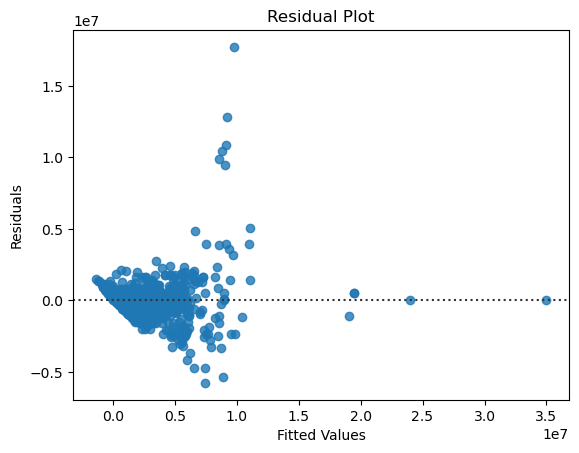

In [48]:
residuals = y_train - ols_results.predict(X_train_ols)
sns.residplot(ols_results.predict(X_train_ols), residuals)
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

#### Interpretation: In above residual plot, the x-axis represents the predicted values or the independent variable, while the y-axis represents the residuals or the difference between the observed values and the predicted values. The maximumn residuals in above graph are randomly scattered around zero, with no specific pattern or trend. 

#### Normality of residuals

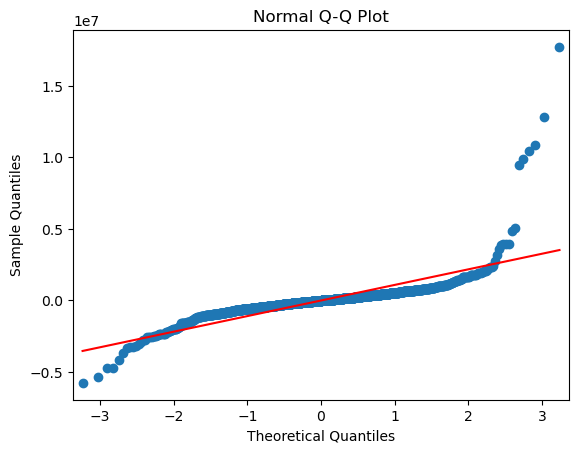

In [49]:
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot')
plt.show()

#### Interpretation: The x-axis represents the theoretical quantiles from a standard normal distribution.The y-axis represents the observed quantiles of the residuals. The residuals are normally distributed, the points on the Q-Q plot will approximately fall along a straight line.

#### Homoscedasticity

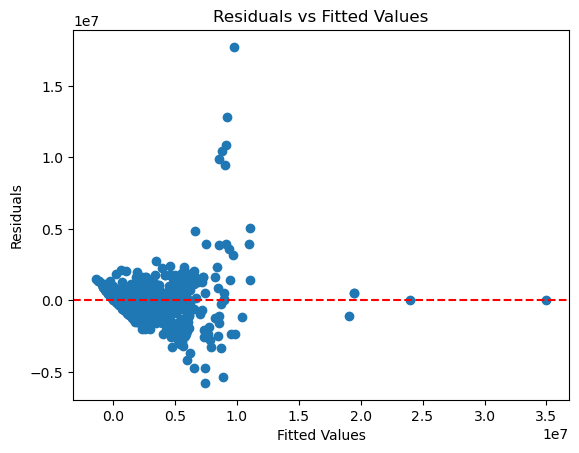

In [50]:
plt.scatter(ols_results.predict(X_train_ols), residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, color='red', linestyle='dashed')
plt.show()

#### Interpretation: The above homoscedasticity plot shows that the maximum points are gathered around zero, but the scale is large, causing some points to be away from zero, it can be considered a volation of homoscedasticity.

### Conclusion: 

The linear regression model performed reasonably well with an R-squared score of 84% on the test dataset. This indicates that approximately 84% of the variability in the target variable can be explained by the linear relationship with the predictor variables.

Furthermore, during training, the Ordinary Least Squares (OLS) algorithm achieved a training result of 81%. The OLS algorithm is commonly used for linear regression and aims to minimize the sum of squared residuals, providing estimates for the coefficients of the linear model.

These results suggest that the linear regression model is able to capture a significant portion of the underlying patterns and relationships in the data. The model's ability to generalize well to unseen data, as indicated by the test R-squared score, indicates that it is not overfitting and can be considered reasonably robust.